In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('thyroid_cancer_risk_data.csv')
data.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [5]:
data.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [6]:
data.nunique()

Patient_ID             212691
Age                        75
Gender                      2
Country                    10
Ethnicity                   5
Family_History              2
Radiation_Exposure          2
Iodine_Deficiency           2
Smoking                     2
Obesity                     2
Diabetes                    2
TSH_Level                 991
T3_Level                  301
T4_Level                  751
Nodule_Size               501
Thyroid_Cancer_Risk         3
Diagnosis                   2
dtype: int64

In [7]:
data.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [8]:
from sklearn.calibration import LabelEncoder

data_dummy = pd.get_dummies(data, columns=['Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk'], drop_first=True)

#Transforma as colunas com mais de um valor em vários valores numéricos (0, 1, 2, etc.)
label = LabelEncoder()

for col in ['Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis']:
    data[col] = label.fit_transform(data[col])
    
target = ['Diagnosis']

data.head()
# data_dummy.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,1,6,2,0,1,0,0,0,0,9.37,1.67,6.16,1.08,1,0
1,2,29,1,2,3,0,1,0,0,0,0,1.83,1.73,10.54,4.05,1,0
2,3,86,1,5,2,0,0,0,0,0,0,6.26,2.59,10.57,4.61,1,0
3,4,75,0,3,1,0,0,0,0,0,0,4.10,2.62,11.04,2.46,2,0
4,5,35,0,2,0,1,1,0,0,0,0,9.10,2.11,10.71,2.11,0,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

X = data.drop(columns=['Diagnosis'])
y = data[target]
var_num = X.select_dtypes(exclude="object").columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
for x in ['Age', 'Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk']:
    if data[x].dtype != 'float64' :
        print(data[[x, target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

    Age  Diagnosis
0    15   0.223259
1    16   0.232278
2    17   0.237582
3    18   0.228937
4    19   0.236916
..  ...        ...
70   85   0.232130
71   86   0.232092
72   87   0.228346
73   88   0.220857
74   89   0.236712

[75 rows x 2 columns]
---------- 

   Gender  Diagnosis
0       0   0.233206
1       1   0.231964
---------- 

   Country  Diagnosis
0        0   0.209172
1        1   0.209457
2        2   0.210003
3        3   0.328878
4        4   0.206261
5        5   0.210289
6        6   0.211626
7        7   0.206014
8        8   0.209077
9        9   0.200701
---------- 

   Ethnicity  Diagnosis
0          0   0.254727
1          1   0.334579
2          2   0.178517
3          3   0.177402
4          4   0.179330
---------- 

   Family_History  Diagnosis
0               0   0.193718
1               1   0.323651
---------- 

   Radiation_Exposure  Diagnosis
0                   0   0.216915
1                   1   0.322348
---------- 

   Iodine_Deficiency  Diagnosis
0   

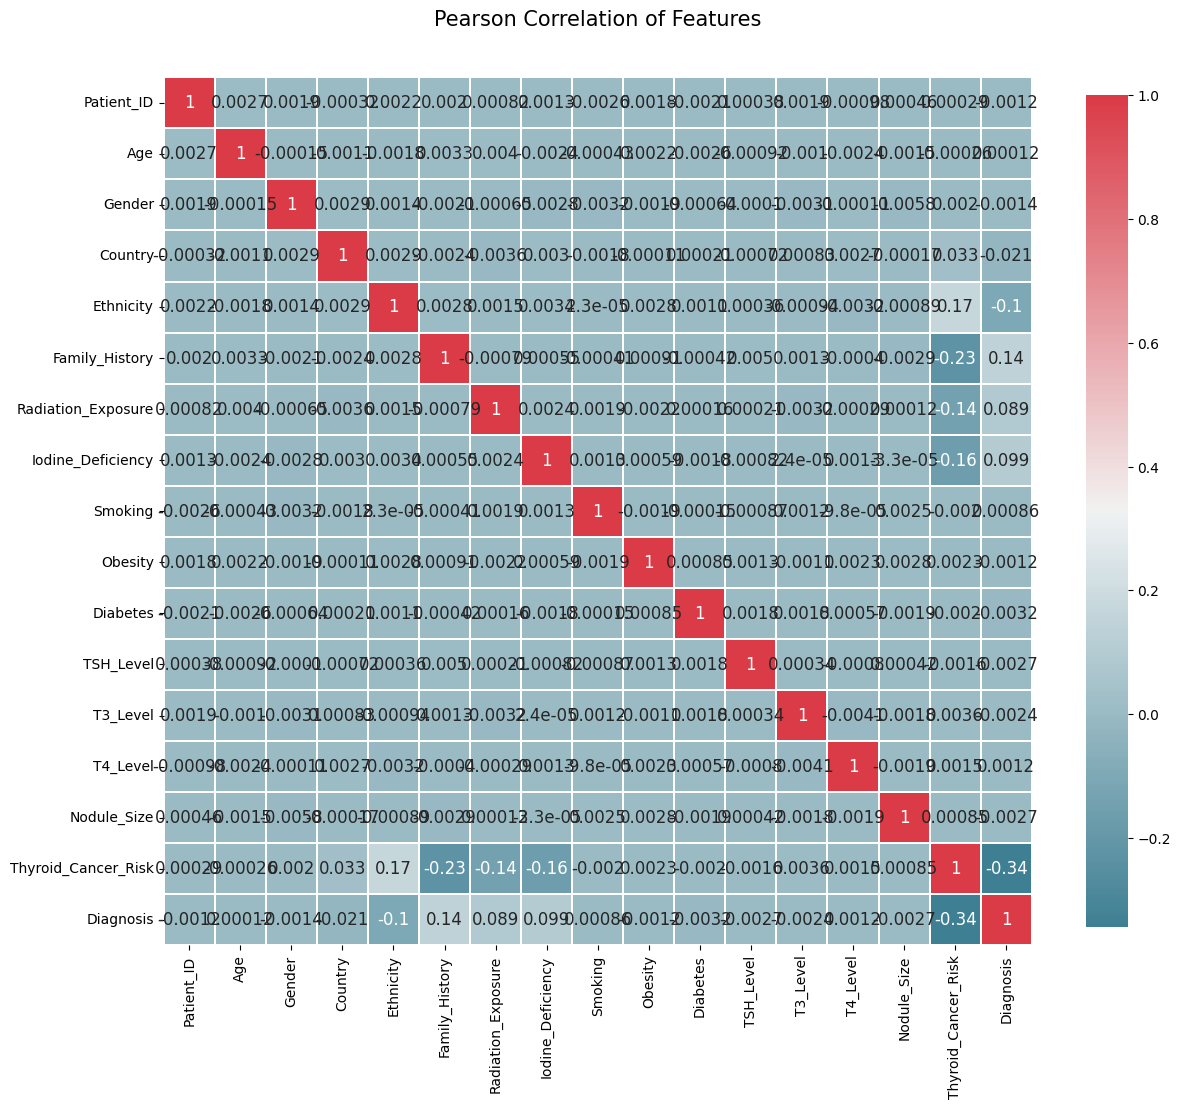

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data)

In [25]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

models = {
    'KNeighborsRegressor' : KNeighborsRegressor(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor(),
    'LinearRegression' : LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'XGBRegressor' : XGBRegressor()
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

model_list = []
r2_list = []
mse_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mse, model_train_mae, model_train_r2 = evaluate_model(model, X_train, X_train, y_train, y_train)
    model_test_mse, model_test_mae, model_test_r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    
    print(f'{list(models.keys())[i]}')
    model_list.append(list(models.keys())[i])
    
    print('Model performance for training set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_mse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R-squared: {:.4f}'.format(model_train_r2))
    
    print('=4' * 35)
    print('Model performance for test set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_mse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R-squared: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)
    mse_list.append(model_test_mse)
    print('=/'* 35)
    print('\n')

KNeighborsRegressor
Model performance for training set
- Root Mean Squared Error: 0.1127
- Mean Absolute Error: 0.2261
- R-squared: 0.3689
=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4
Model performance for test set
- Root Mean Squared Error: 0.1702
- Mean Absolute Error: 0.2853
- R-squared: 0.0466
=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/


DecisionTreeRegressor
Model performance for training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R-squared: 1.0000
=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4
Model performance for test set
- Root Mean Squared Error: 0.2960
- Mean Absolute Error: 0.2960
- R-squared: -0.6584
=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/




c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor
Model performance for training set
- Root Mean Squared Error: 0.1397
- Mean Absolute Error: 0.2792
- R-squared: 0.2178
=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4
Model performance for test set
- Root Mean Squared Error: 0.1409
- Mean Absolute Error: 0.2809
- R-squared: 0.2107
=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/


LinearRegression
Model performance for training set
- Root Mean Squared Error: 0.1552
- Mean Absolute Error: 0.3106
- R-squared: 0.1308
=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4
Model performance for test set
- Root Mean Squared Error: 0.1560
- Mean Absolute Error: 0.3113
- R-squared: 0.1262
=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/


Ridge
Model performance for training set
- Root Mean Squared Error: 0.1552
- Mean Absolute Error: 0.3106
- R-squared: 0.1308
=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4=4
Model perform

In [27]:
pd.DataFrame(list(zip(model_list, r2_list, mse_list)), columns=['Model', 'R^2','MSE']).sort_values(by = 'R^2', ascending = False)

,Model,R^2,MSE
2,AdaBoostRegressor,2.107046e-01,0.140869
6,XGBRegressor,1.928390e-01,0.144057
4,Ridge,1.262033e-01,0.155950
3,LinearRegression,1.262033e-01,0.155950
0,KNeighborsRegressor,4.661767e-02,0.170154
5,Lasso,-2.622387e-07,0.178474
1,DecisionTreeRegressor,-6.583998e-01,0.295982


In [28]:
lin_model = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model: ", score) 

Accuracy of the model:  -66.56003487099078
